# Analysis of Danish GDP and Phillips curve
Our data project uses data imported from Statistics Denmark. We import data about the Danish Gross Domestic Product (GDP) in per capita current prices (1000 DKK) and 2010-prices chained values (1000 DKK). Further, we download information for Danish inflation and unemployment statistics. This we have done in order to make a Danish Phillips curve.

#### Import of relevant packages
Before we can begin our analysis, we start start our project by improting relevant packages. This includes pandas, numpy matplot lib and plotly. The last one will be usefull for when we will make interactive plots

Last package we import, is package from "Danmarks Statistik", so we can import relevant statistics.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import pydst
dst = pydst.Dst(lang = 'da')

#### Examination of Danish GDP per capita

After importing relevant packages, we redefine columns that are used in DST, so they have english names. On top of that, this will help us choosing relevant columns when we make our tables

In [184]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'
columns_dict['HOVED'] = 'Type'
columns_dict['PERPCT'] = 'Type'

Now we define the individual, relevant, variables from DST columns

In [185]:
var_dict = {} # var is for variable

#VARIABLES
var_dict['B.1*g Bruttonationalprodukt, BNP'] = 'Y'
var_dict['P.31 Privatforbrug'] = 'C'
var_dict['P.3 Offentlige forbrugsudgifter'] = 'G'
var_dict['P.5g Bruttoinvesteringer'] = 'I'
var_dict['P.6 Eksport af varer og tjenester'] = 'X'
var_dict['P.7 Import af varer og tjenester'] = 'M'
var_dict['ÅRSSTIGNING'] = 'Inflation'

#UNITS
unit_dict = {}
unit_dict['2010-priser, kædede værdier'] = 'realle'
unit_dict['løbende priser'] = 'nominelle'


Next section we define a variable "NAN1". This variable is a matrix of variables 'TRANSAKT', 'PRISENHED' and 'TID'. The individual variables will then be renamed to our specified var-name from columns_dict.

In [186]:
#CODE
nan1 = dst.get_data(table_id = 'NAN1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})
nan1.rename(columns = columns_dict, inplace = True)

for key,value in var_dict.items():
    nan1.variable.replace(key,value,inplace=True)

for key,value in unit_dict.items():
    nan1.unit.replace(key,value, inplace=True)

I = False
for key,value in var_dict.items():
    I = I | (nan1.variable == value)
nan1 = nan1[I]



We now make a variable 'X'. This variable removes all years prior to 2001. We use nan1=nan1[X] to make sure that from now un the dataset nan1 have all the newest values. Further, we make 2 other nan values, which will be usefull later in our project. 

Last line in the following section makes a new variable, which only selects the unit 'Pr. indbygger, løbende priser, (1000 kr.)', which is current prices per capita. 

In [187]:
X = nan1["year"]>2000 
nan1 = nan1[X]
nan2=nan1
nan3=nan1

Y=nan1["unit"]=="Pr. indbygger, løbende priser, (1000 kr.)"

In the next section, we will select a different unit, this time 'Pr. indbygger, 2010- priser, kædede vædier, (1000 kr.)', which is our chained prices per. capita. The suffix _K indicates that its chained values. 
At the end, we sort our values first by year and then by variable (in assending order).
Last note, we make sure that our data is in dataFrame

In [188]:
nan1 = nan1[Y]
df=pd.DataFrame(data=nan1)
df.sort_values(by=["year","variable"])


X = nan2["year"]>2000
nan2 = nan2[X]
Y=nan2["unit"]=="Pr. indbygger, 2010-priser, kædede værdier, (1000 kr.)"
nan2 = nan2[Y]
df_K=pd.DataFrame(data=nan2)
df_K.sort_values(by=["year","variable"])


,variable,unit,year,value
4130,C,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2001,"140,8"
4124,G,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2001,"78,4"
4184,I,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2001,"64,0"
4256,M,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2001,"104,9"
4238,X,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2001,"134,5"
3663,Y,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2001,"315,6"
4316,C,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2002,"142,4"
4310,G,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2002,"79,8"
4370,I,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2002,"63,0"
4442,M,"Pr. indbygger, 2010-priser, kædede værdier, (1...",2002,"111,2"


We make new data frame for real growth. Suffix _Y indicates real growth in GDP (Y)

In [189]:
X = nan3["year"]>2000
nan3 = nan3[X]
bb=nan3["variable"]=="Y"
nan3 = nan3[bb]
Y=nan3["unit"]=="Realvækst i pct. i forhold til foregående periode"
nan3 = nan3[Y]
df_Y=pd.DataFrame(data=nan3)
df_Y.sort_values(by=["year","variable"])


,variable,unit,year,value
3665,Y,Realvækst i pct. i forhold til foregående periode,2001,"0,8"
4294,Y,Realvækst i pct. i forhold til foregående periode,2002,"0,5"
4480,Y,Realvækst i pct. i forhold til foregående periode,2003,"0,4"
5115,Y,Realvækst i pct. i forhold til foregående periode,2004,"2,7"
5301,Y,Realvækst i pct. i forhold til foregående periode,2005,"2,3"
5933,Y,Realvækst i pct. i forhold til foregående periode,2006,"3,9"
6119,Y,Realvækst i pct. i forhold til foregående periode,2007,"0,9"
6749,Y,Realvækst i pct. i forhold til foregående periode,2008,"-0,5"
6935,Y,Realvækst i pct. i forhold til foregående periode,2009,"-4,9"
7121,Y,Realvækst i pct. i forhold til foregående periode,2010,"1,9"


The next two sections, we make a new index, our year. Then we sort by this index, make sure that our comma values have the correct decimal (dot instead of comma) and we make a new collumn which is our net export

In [190]:
df.set_index(['year'], inplace=True)
df.sort_index(inplace=True)


In [191]:
df["value"]=df["value"].str.replace(",",".").astype(float)

# komma til punktum før to numeric 
NX = pd.to_numeric(df.loc[:,:].value[df.loc[:,:].variable == "X" ]) - pd.to_numeric(df.loc[:,:].value[df.loc[:,:].variable == "M" ])
NX.columns=["year","value"]
print(NX)


year
2001    18.3
2002    18.0
2003    18.1
2004    15.7
2005    16.1
2006    12.7
2007     9.2
2008    11.6
2009    14.1
2010    22.6
2011    21.2
2012    20.4
2013    22.7
2014    24.4
2015    24.3
2016    24.7
2017    26.8
2018    20.4
Name: value, dtype: float64


We now remake our table in such a way, so Net export is added, while export and import are removed. There is an error message which have no effect on our project. We tried to fix it, but could not do so without breaking our code

In [192]:
NX=pd.DataFrame(data=NX)

NX["variable"] ="NX"


dollo= pd.concat([df, NX])

dollo.sort_index(inplace=True)
dollo
#her fjerner vi X og M
dollo=dollo[dollo.variable !='X']
dollo=dollo[dollo.variable !='M']
dollo.sort_values(by=["year","variable"])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,unit,value,variable
year,,,
2001,"Pr. indbygger, løbende priser, (1000 kr.)",119.6,C
2001,"Pr. indbygger, løbende priser, (1000 kr.)",62.3,G
2001,"Pr. indbygger, løbende priser, (1000 kr.)",55.9,I
2001,NaN,18.3,NX
2001,"Pr. indbygger, løbende priser, (1000 kr.)",256.0,Y
2002,"Pr. indbygger, løbende priser, (1000 kr.)",123.1,C
2002,"Pr. indbygger, løbende priser, (1000 kr.)",65.2,G
2002,"Pr. indbygger, løbende priser, (1000 kr.)",56.0,I
2002,NaN,18.0,NX


We make a GDP variable. 

In [193]:
Y = pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable == 'C']) + pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable== 'G']) + pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable== 'I'])  + pd.to_numeric(dollo.loc[:,:].value[dollo.loc[:,:].variable== 'NX'])
Y.columns=['year','value']


We make a new data frame, for the total GDP, with year as index.

In [194]:
Y = pd.DataFrame(data=Y)
Y['variable'] = 'Y'
Y


,value,variable
year,,
2001,256.1,Y
2002,262.3,Y
2003,266.5,Y
2004,278.7,Y
2005,292.7,Y
2006,309.5,Y
2007,318.4,Y
2008,328.0,Y
2009,311.9,Y


Now we will plot the data for GDP in current prices. For this we use a simple plot. 

Text(0.5, 1.0, 'Figure 1. GDP per capita, current prices')

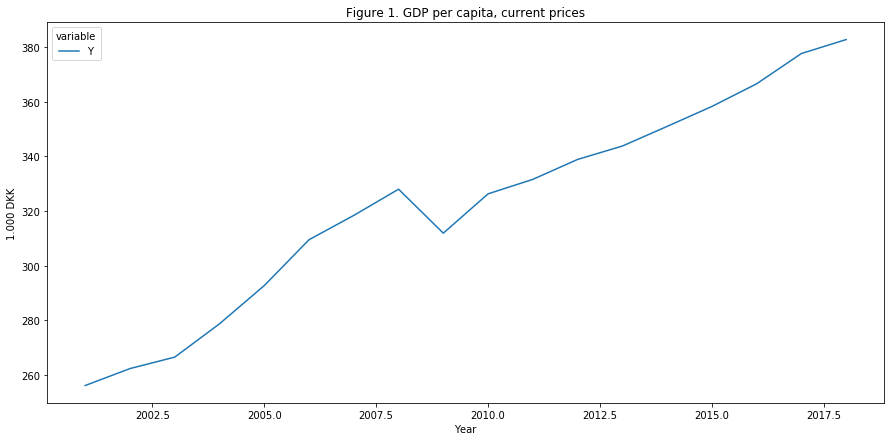

In [195]:
fig, ax = plt.subplots(figsize=(15,7))
Y.groupby(['year','variable']).sum()['value'].unstack().plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('1.000 DKK')  
ax.set_title('Figure 1. GDP per capita, current prices')

Figure 1 shows the development in GDP per capita in current values on the left axis in 1000 Danish Kroner in the period 2001 - 2018 
When we look at the development in the Danish GDP per capita, we see there is an upward trend in GPD per capita with a minor decrease from 2008 to 2009. However, this development does not tell us much, as inflation is not adjusted for. The examine the development of GDP per capita in current prices does not tell us much, therefor we will investigate the development measured in chained-prices, 2010-prices.


After making a graph for current prices, we will make a figure for chained prices instead. The procedure is identical

In [196]:
df_K.set_index(['year'], inplace=True)
df_K.sort_index(inplace=True)

df_K["value"]=df_K["value"].str.replace(",",".").astype(float)
df_K.sort_index(inplace=True)
NX_K = pd.to_numeric(df_K.loc[:,:].value[df_K.loc[:,:].variable == "X" ]) - pd.to_numeric(df_K.loc[:,:].value[df_K.loc[:,:].variable == "M" ])
NX_K.columns=["year","value"]

Sorting

In [197]:
NX_K=pd.DataFrame(data=NX_K)

NX_K["variable"] ="NX"

dollo_K= pd.concat([df_K, NX_K])
dollo_K.sort_index(inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [198]:
dollo_K=dollo_K[dollo_K.variable !='X']
dollo_K=dollo_K[dollo_K.variable !='M']
dollo_K=dollo_K[dollo_K.variable !='Y']
dollo_K.sort_values(by=["year","variable"])


,unit,value,variable
year,,,
2001,"Pr. indbygger, 2010-priser, kædede værdier, (1...",140.8,C
2001,"Pr. indbygger, 2010-priser, kædede værdier, (1...",78.4,G
2001,"Pr. indbygger, 2010-priser, kædede værdier, (1...",64.0,I
2001,NaN,29.6,NX
2002,"Pr. indbygger, 2010-priser, kædede værdier, (1...",142.4,C
2002,"Pr. indbygger, 2010-priser, kædede værdier, (1...",79.8,G
2002,"Pr. indbygger, 2010-priser, kædede værdier, (1...",63.0,I
2002,NaN,28.6,NX
2003,"Pr. indbygger, 2010-priser, kædede værdier, (1...",143.9,C


In [199]:
Y = pd.to_numeric(dollo_K.loc[:,:].value[dollo_K.loc[:,:].variable == 'C']) + pd.to_numeric(dollo_K.loc[:,:].value[dollo_K.loc[:,:].variable== 'G']) + pd.to_numeric(dollo_K.loc[:,:].value[dollo_K.loc[:,:].variable== 'I'])  + pd.to_numeric(dollo_K.loc[:,:].value[dollo_K.loc[:,:].variable== 'NX'])
Y.columns=['year','value']


In [200]:
Y = pd.DataFrame(data=Y)
Y['variable'] = 'Y'
Y


,value,variable
year,,
2001,312.8,Y
2002,313.8,Y
2003,314.2,Y
2004,321.8,Y
2005,328.7,Y
2006,340.7,Y
2007,342.7,Y
2008,339.6,Y
2009,321.6,Y


To simplify creating of our following figures, we reset index for our Y1 value

In [201]:
dollo_K1 = dollo_K.reset_index()
Y1 = Y.reset_index()

nan3.set_index(['year'], inplace=True)
nan3.sort_index(inplace=True)
nan3=nan3.reset_index()
nan3["value"]=nan3["value"].str.replace(",",".").astype(float)


For the following figure, we will make two Y-axis

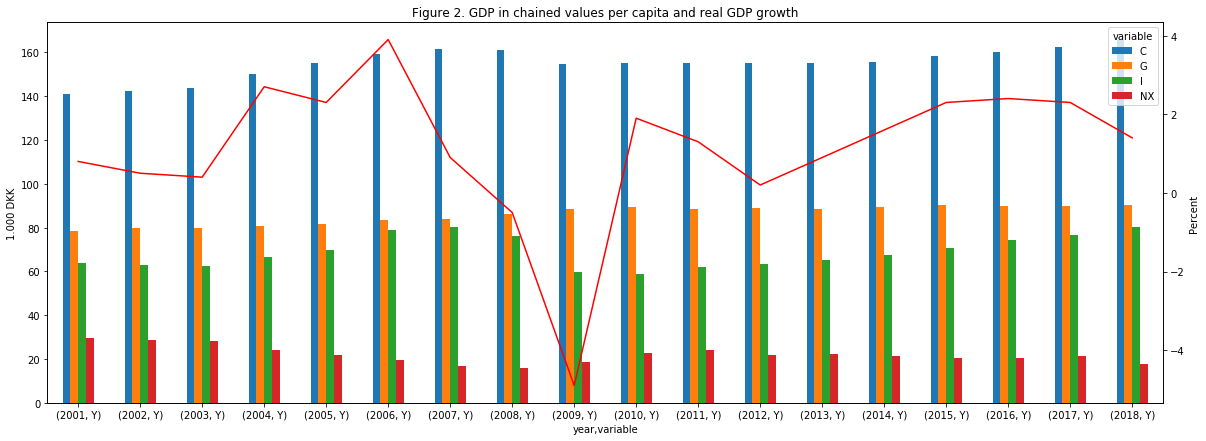

In [202]:
fig, ax = plt.subplots(figsize=(20,7))
dollo_K1.groupby(['year','variable']).sum()['value'].unstack().plot( ax=ax,  kind='bar', stacked = False)
nan3.groupby(['year','variable']).sum()['value'].plot(ax=ax,  secondary_y=True, color="r").set_ylabel("Percent")
ax.set_ylabel('1.000 DKK')
ax.set_title('Figure 2. GDP in chained values per capita and real GDP growth')
plt.show()


Figure 2 shows the development in the components of GDP on the left axis in 1000 Danish Kroner, while the real growth of GDP is shown in percent on the right axis.

In this part, we will analyze the development in the Danish GDP and its componets in relation to business cycles. 
Before we begin our formal analysis, we will briefly describe the relevant business cycles in regard to Figure 2. 
Note the years 1994 - 2000 was a period with “boom”, however these years are not present in the figure.   
The period 2001 - 2003 is considered as a period with “recession” ith a average growthrate of 0.6% pro anno
The period 2004 - 2007 is considered as a period with “boom” with a average growthrate of 2.4% pro anno.
The period 2008 - 2015 is considered as a period with “recession” with a average growthrate of -0.1% pro anno.
From 2016 and forward we do not have a clear definition of the annual growth rate, so we cannot with certain define the exact business cycle. 

The overall picture of the develepment in the compoments of GDP are:
Private consumption: Is affect of the business cycles of the economy, in periods with "recession" people tend to spend less money, while the spend more money in periods with "booms", which is also clear from Figure 2.
Investments: Are one of the most volatile components in GDP and highly affeced by business cycles, they story is the same as with Private Consumption, but the is a much clear relationship between investments and busines cycles.
Goverment spending: Is not that very volatile. The purpose of goverment spending is to stabilize the economy in business cycles. The goverment tend to use more money in periods with "recession", and spend less money in periods with "booms"
Netexport: Also highly corrolated with the business cycles. Note: when netexport is positive we sell more to foreign countries than we buy from them. When the netexport is negative we buy more from the foreign countries than we sell to them.

#### Creating Danish Phillips curve

In the last section of our project, we will create 3 curves. One theoretical, one non-interactive scatterplot and one interactive.

We begin by getting statistics for inflation in Denmark

In [204]:
pris119 = dst.get_data(table_id = 'PRIS119', variables={'TID':['*'], 'HOVED':['*']})
pris119.rename(columns = columns_dict, inplace = True)

We create a new variable, which becomres our dataframe. Further, we remove 'Årsgennemsnit' as it is not usefull for our analysis. At last we remove missing value. 

Second part of this code is to get statistic for unemployment in Denmark. We use same procedure like previously

In [210]:
infl = pd.DataFrame(data=pris119)
infl = infl[infl.Type !='Årsgennemsnit']
infl = infl[infl.value !='..']
infl["value"]=infl["value"].str.replace(",",".").astype(float)



AULAAR = dst.get_data(table_id = 'AULAAR', variables={'TID':['*']})
X = AULAAR["TID"]>1996
AULAAR1 = AULAAR[X]
AULAAR1.rename(columns = columns_dict, inplace = True)


In [211]:
AULAAR1 = pd.DataFrame(data=AULAAR1)
AULAAR1['value']=AULAAR1['value'].str.replace(',','.').astype(float)




We make a new variable 'aaar', which will be useful later, when we make an interactive plot

In [212]:
aaar= pd.DataFrame(data=AULAAR1["year"])
aaar.set_index(['year'], inplace=True)
aaar.sort_index(inplace=True)
aaar = aaar.reset_index()

Next part will be to make hypothetical values for inflation and unemployment, so we can make our theoretical Phillips curve.

In [213]:
x_coords = [0.0, 0.1, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.2]
y_coords = [4, 2, 2, 1.5, 1.3, 1.25, 1.2, 1.15, 1.14, 1.13, 1.1, 1.05, 1.03, 1.01]


Now we have all the nessesary information to make a Danish Phillips curve. First, we will make a non-interactive scatterplot. On x-axis we put Unemployment and on y-axis we put inflation

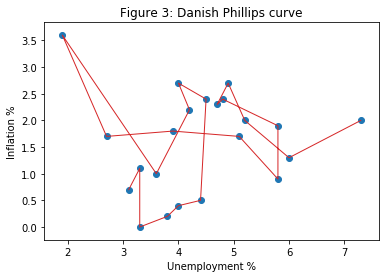

Text(0, 0.5, 'Inflation %')

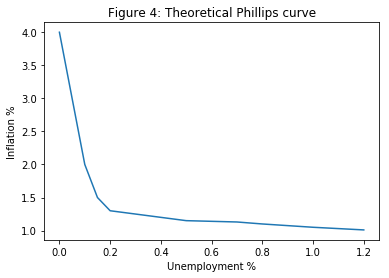

In [217]:
plt.subplot()
plt.plot(AULAAR1['value'], infl['value'], 'C3', zorder=1, lw=1)
plt.scatter(AULAAR1['value'], infl['value'], label='year')
plt.title('Figure 3: Danish Phillips curve')
plt.xlabel('Unemployment %')
plt.ylabel('Inflation %')
plt.show()

plt.subplot()
plt.plot(x_coords, y_coords)
plt.title('Figure 4: Theoretical Phillips curve')
plt.xlabel('Unemployment %')
plt.ylabel('Inflation %')

The meaning of this section is to illustrate, that the "theoretical" Phillips curve and the "empirical" Phillips curve is not corrosponding. By looking at Figure 3 we cannot find an exacet pattern to follow, this is just to sho

In the end, we will make identical figure to figure 3, but this time it will be interactive

In [ ]:
plotly.offline.plot({
    "data": [go.Scatter(x=AULAAR1["value"], y=infl["value"], text=aaar["year"], textposition='top center', mode=('lines+text'))],
    "layout": go.Layout(title="Figur 5: Interaktive, Danish Phillips curve")
}, auto_open=True)